In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import StandardScaler # Used for scaling of data
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from keras import backend as K
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix

Using TensorFlow backend.


In [36]:
df = pd.read_csv('House Sales.csv', index_col=0)

In [37]:
df.tail()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [38]:
df = df.drop('waterfront', axis=1)
df = df.drop('view', axis=1)
df = df.drop('sqft_basement', axis=1)
df = df.drop('yr_renovated', axis=1)


In [39]:
saleprice_scaled = StandardScaler().fit_transform(df['price'][:,np.newaxis]);

In [40]:
data = pd.get_dummies(df)

In [41]:
scale = MinMaxScaler()

In [42]:
from sklearn.model_selection import train_test_split
# split the dataset into 2 training and 2 testing sets
X_train, X_test, Y_train, Y_test = train_test_split(data.drop('price', axis=1), data['price'], test_size=0.2, random_state=42)

In [44]:
X_train = scale.fit_transform(X_train)
X_test = scale.fit_transform(X_test)

In [46]:
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(1))
# Compile model
model.compile(optimizer ='adam', loss = 'mean_squared_error', metrics =[metrics.mae])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 128)               49536     
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 129       
Total params: 49,665
Trainable params: 49,665
Non-trainable params: 0
_________________________________________________________________


In [47]:
history = model.fit(X_train, Y_train, validation_data=(X_test,Y_test), epochs=30, batch_size=32)

Train on 17290 samples, validate on 4323 samples
Epoch 1/30
17290/17290 [==============================] - 3s 150us/step - loss: 419738912757.3395 - mean_absolute_error: 537675.8595 - val_loss: 452657732557.5461 - val_mean_absolute_error: 549090.3040
Epoch 2/30
17290/17290 [==============================] - 2s 95us/step - loss: 419121594572.6816 - mean_absolute_error: 537131.6597 - val_loss: 451717680012.1693 - val_mean_absolute_error: 548284.6398
Epoch 3/30
17290/17290 [==============================] - 2s 92us/step - loss: 417952423832.7116 - mean_absolute_error: 536098.7993 - val_loss: 450259682420.7781 - val_mean_absolute_error: 547032.7382
Epoch 4/30
17290/17290 [==============================] - 2s 105us/step - loss: 416333657021.5496 - mean_absolute_error: 534656.5721 - val_loss: 448378407543.5021 - val_mean_absolute_error: 545413.2670
Epoch 5/30
17290/17290 [==============================] - 3s 149us/step - loss: 414327460881.8859 - mean_absolute_error: 532866.3598 - val_loss: 

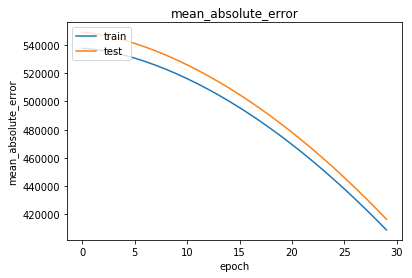

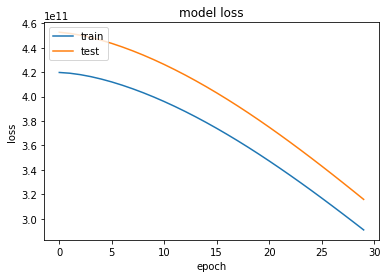

In [48]:
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('mean_absolute_error')
plt.ylabel('mean_absolute_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [49]:
prediction = model.predict(X_test)

In [50]:
test_loss,test_acc=model.evaluate(X_test,Y_test)

4323/4323 [==============================] - 0s 25us/step


In [51]:
print('loss = ',test_loss,'acc = ',test_acc)

loss =  315837554525.0317 acc =  416556.2588191071


In [52]:
model2 = Sequential()
model2.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model2.add(Dense(1))
# Compile model
model2.compile(optimizer ='adam', loss = 'mean_squared_error', metrics =[metrics.mae])
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 64)                24768     
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 65        
Total params: 24,833
Trainable params: 24,833
Non-trainable params: 0
_________________________________________________________________


In [53]:
history = model2.fit(X_train, Y_train, validation_data=(X_test,Y_test), epochs=30, batch_size=32)

Train on 17290 samples, validate on 4323 samples
Epoch 1/30
17290/17290 [==============================] - 2s 121us/step - loss: 419777261841.3826 - mean_absolute_error: 537710.0445 - val_loss: 452780004450.7759 - val_mean_absolute_error: 549195.0715
Epoch 2/30
17290/17290 [==============================] - 1s 76us/step - loss: 419402593848.4414 - mean_absolute_error: 537377.1929 - val_loss: 452211662175.2820 - val_mean_absolute_error: 548708.1122
Epoch 3/30
17290/17290 [==============================] - 1s 74us/step - loss: 418693805455.7687 - mean_absolute_error: 536749.9600 - val_loss: 451326219719.0321 - val_mean_absolute_error: 547948.6776
Epoch 4/30
17290/17290 [==============================] - 1s 82us/step - loss: 417702690234.1738 - mean_absolute_error: 535874.5886 - val_loss: 450172063805.5868 - val_mean_absolute_error: 546957.2870
Epoch 5/30
17290/17290 [==============================] - 1s 79us/step - loss: 416471485514.0312 - mean_absolute_error: 534782.2852 - val_loss: 44

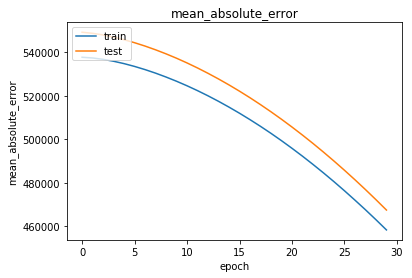

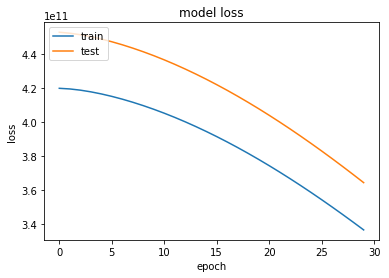

In [54]:
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('mean_absolute_error')
plt.ylabel('mean_absolute_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [55]:
prediction = model2.predict(X_test)

In [56]:
test_loss,test_acc=model2.evaluate(X_test,Y_test)

4323/4323 [==============================] - 0s 33us/step


In [57]:
print('loss = ',test_loss,'acc = ',test_acc)

loss =  364246222575.59656 acc =  467548.1944034814
